# 训练情感分类器

这是[深圳技术大学2025秋季微专业课](https://hqyang.github.io/nlp-fall25/)使用的Jupyter Notebook。下面尝试基于数据进行训练。具体来说，它使用词袋提取特征，并使用结构化感知器算法训练分类器。

它将接收文本`X`并返回一个`标签`，如果文本的情感类型是积极的，则为“1”，如果文本的情感类型是消极的，则为“-1”，如果文本的情感类型是中性的，则为“0”。
你可以在[Stanford Sentiment Treebank](http://nlp.stanford.edu/sentiment/index.html)运行此脚本测试你的分类器的准确性。 

## Setup

Setup code, do imports.

In [1]:
import random
import tqdm

## 特征抽取 Feature Extraction

Feature extraction code, how do we get the features we use in training? By default we just use every word.

In [2]:
def extract_features(x: str) -> dict[str, float]:
    features = {}
    x_split = x.split(' ')
    for x in x_split:
        features[x] = features.get(x, 0) + 1.0
    return features

Also, initialize the feature weights to zero.

In [3]:

feature_weights = {}

## Data Reading

Read in the data from the training and dev (or finally test) sets

In [4]:
def read_xy_data(filename: str) -> tuple[list[str], list[int]]:
    x_data = []
    y_data = []
    with open(filename, 'r') as f:
        for line in f:
            label, text = line.strip().split(' ||| ')
            x_data.append(text)
            y_data.append(int(label))
    return x_data, y_data

In [5]:
x_train, y_train = read_xy_data('../data/sst-sentiment-text-threeclass/train.txt')
x_dev, y_dev = read_xy_data('../data/sst-sentiment-text-threeclass/dev.txt')

In [6]:
print(x_train[0])
print(y_train[0])

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
1


## 推理 Inference Code

How we run the classifier.

In [7]:
def run_classifier(features: dict[str, float]) -> int:
    score = 0
    for feat_name, feat_value in features.items():
        score = score + feat_value * feature_weights.get(feat_name, 0)
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

## 训练 Training Code

Learn the weights of the classifier.

In [8]:
NUM_EPOCHS = 5
for epoch in range(1, NUM_EPOCHS+1):
    # Shuffle the order of the data
    data_ids = list(range(len(x_train)))
    random.shuffle(data_ids)
    # Run over all data points
    for data_id in tqdm.tqdm(data_ids, desc=f'Epoch {epoch}'):
        x = x_train[data_id]
        y = y_train[data_id]
        # We will skip neutral examples
        if y == 0:    
            continue
        # Make a prediction
        features = extract_features(x)
        predicted_y = run_classifier(features)
        # Update the weights if the prediction is wrong
        if predicted_y != y:
            for feature in features:
                feature_weights[feature] = feature_weights.get(feature, 0) + y * features[feature]

Epoch 5: 100%|██████████| 8544/8544 [00:00<00:00, 264159.44it/s]


## 评估 Evaluation Code

How we evaluate the classifier:

In [9]:
def calculate_accuracy(x_data: list[str], y_data: list[int]) -> float:
    total_number = 0
    correct_number = 0
    for x, y in zip(x_data, y_data):
        y_pred = run_classifier(extract_features(x))
        total_number += 1
        if y == y_pred:
            correct_number += 1
    return correct_number / float(total_number)

In [10]:
label_count = {}
for y in y_dev:
    if y not in label_count:
        label_count[y] = 0
    label_count[y] += 1
print(label_count)

{1: 444, 0: 229, -1: 428}


In [11]:
train_accuracy = calculate_accuracy(x_train, y_train)
test_accuracy = calculate_accuracy(x_dev, y_dev)
print(f'Train accuracy: {train_accuracy}')
print(f'Dev/test accuracy: {test_accuracy}')

Train accuracy: 0.7332631086142322
Dev/test accuracy: 0.5676657584014533


## 错误分析 Error Analysis 

改进任何系统的一个重要部分就是找出问题出在哪里。下面这个函数允许您随机观察一些错误的示例，这可能有助于您改进分类器。您也可以为错误分析编写更复杂的方法。

In [12]:
def find_errors(x_data, y_data):
    error_ids = []
    y_preds = []
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        y_preds.append(run_classifier(extract_features(x)))
        if y != y_preds[-1]:
            error_ids.append(i)
    for _ in range(5):
        my_id = random.choice(error_ids)
        x, y, y_pred = x_data[my_id], y_data[my_id], y_preds[my_id]
        print(f'{x}\ntrue label: {y}\npredicted label: {y_pred}\n')

In [13]:
find_errors(x_dev, y_dev)

I ca n't say that I liked Homeboy ; it 'd be more accurate to say that I found it intriguing , bizarre , Dogma-like in spots - and quite truthful , in its way .
true label: 0
predicted label: 1

For anyone unfamiliar with pentacostal practices in general and theatrical phenomenon of Hell Houses in particular , it 's an eye-opener .
true label: 1
predicted label: -1

It ca n't decide if it wants to be a mystery\/thriller , a romance or a comedy .
true label: -1
predicted label: 1

It 's dumb , but more importantly , it 's just not scary .
true label: -1
predicted label: 1

Dilbert without the right-on satiric humor .
true label: 0
predicted label: -1



## 显示结果 Plot results

You may replace train_accuracy, test_accuracy, x_labels as you need 

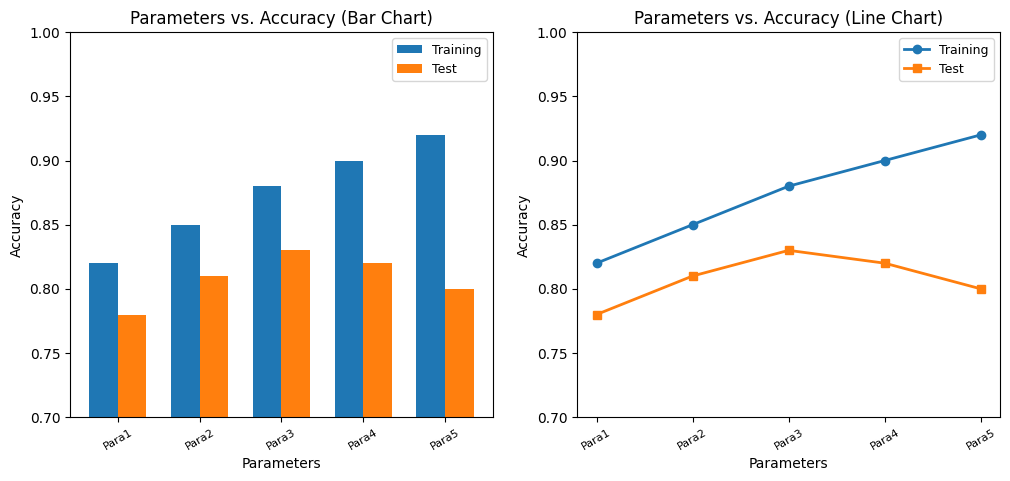

In [ ]:
# Examples for showing results
import matplotlib.pyplot as plt
import numpy as np

# 示例数据（请替换为你的实际数据）
train_accuracy = [0.82, 0.85, 0.88, 0.90, 0.92]
test_accuracy = [0.78, 0.81, 0.83, 0.82, 0.80]
x_labels = ["Para1", "Para2", "Para3", "Para4", "Para5"]  # x轴标签（需替换为实际方案）

# 如果需要设置中文字体，确保中文正常显示 
# plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1行2列的子图，画布大小12x5

# 第一个子图：柱状图
x = np.arange(len(x_labels))  # x轴位置
width = 0.35  # 柱子宽度

ax1.bar(x - width/2, train_accuracy, width, label='Train')
ax1.bar(x + width/2, test_accuracy, width, label='Test')

# 设置柱状图属性
ax1.set_xlabel('Parameters', fontsize=10)  # x轴标签及字体大小
ax1.set_ylabel('Accuracy', fontsize=10)    # y轴标签及字体大小
ax1.set_title('Parameters vs. Accuracy (Bar Chart)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, fontsize=8, rotation=30)  # x轴刻度标签及字体大小
ax1.legend(fontsize=9)  # 图例字体大小
ax1.set_ylim(0.7, 1.0)  # 设置y轴范围（根据实际数据调整）

# 第二个子图：折线图
ax2.plot(x_labels, train_accuracy, marker='o', label='Train', linewidth=2)
ax2.plot(x_labels, test_accuracy, marker='s', label='Test', linewidth=2)

# 设置折线图属性
ax2.set_xlabel('Parameters', fontsize=10)
ax2.set_ylabel('Accuracy', fontsize=10)
ax2.set_title('Parameters vs. Accuracy (Line Chart)', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, fontsize=8, rotation=30)
ax2.legend(fontsize=9)
ax2.set_ylim(0.7, 1.0)

# 调整布局，避免标签重叠
#plt.tight_layout()

# 显示图形
plt.show()

# 可选：保存图形
# fig.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')

# 练习作业
基于上述代码，完成下面练习: 
1. 编写自动化脚本(仅1个函数)，测试至少3种关键因素对模型分类性能的影响，生成性能对比报告
1）关键因素可参考以下说明
2）生成可视化对比结果（使用matplotlib绘制不同参数下的性能指标折线图 / 柱状图）

2. 针对最优性能模型，提取并分析分类错误的样本，总结错误模式及可能原因
3. 需提供简要注释

说明:
1. 关键因素可参考:
1) 文本预处理方式：如是否去除标点符号、是否小写化、是否去除停用词
2) 词袋特征参数
3）训练数据比例 
4) 模型超参(如有)